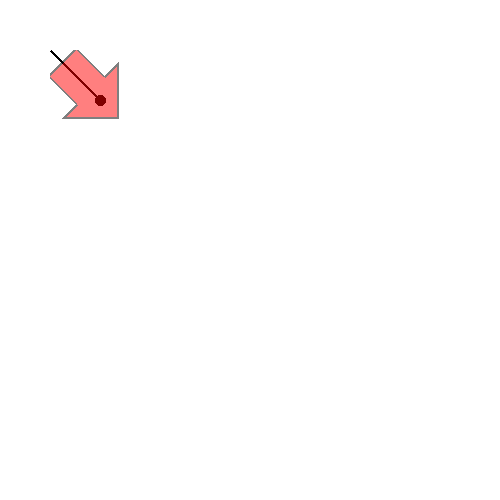

In [82]:
# draw arrowblock at the correct angle given two points

import mm.image
from PIL import Image, ImageDraw 
from math import atan2, degrees
from dataclasses import dataclass

@dataclass
class Point:
    x: int
    y: int


src = Point(50, 50)
dst = Point(100, 100)
    
# src = Point(100, 100)
# dst = Point(50, 50)

# src = Point(100, 50)
# dst = Point(50, 100)

# src = Point(50, 100)
# dst = Point(100, 50)

a = mm.image.ArrowBlock(fill="red")
bg = Image.new("RGBA", (500, 500), "white")
c = ImageDraw.Draw(bg)
c.line([(src.x, src.y),(dst.x, dst.y)], fill="black", width=2)
c.ellipse([(dst.x - 5, dst.y - 5), (dst.x + 5, dst.y + 5)], fill="black")

# get angle of vectors
degs = degrees(atan2(dst.y - src.y, dst.x - src.x))
a.img = a.img.rotate(degs)
# atan2 assume y axis is bottom to top, but PIL uses y axis of top to bottom.
a.img = a.img.transpose(Image.FLIP_TOP_BOTTOM)


bg = a.overlay(bg, (src.x, src.y), 128)
bg